<a href="https://colab.research.google.com/github/vcolonnas25/Maestria/blob/main/Semana%201/S1TC1_arboles_ensamblajes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, roc_curve, auc

from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [ ]:
# Celda 1.1
mean_season = bikes.groupby('season').total.mean()

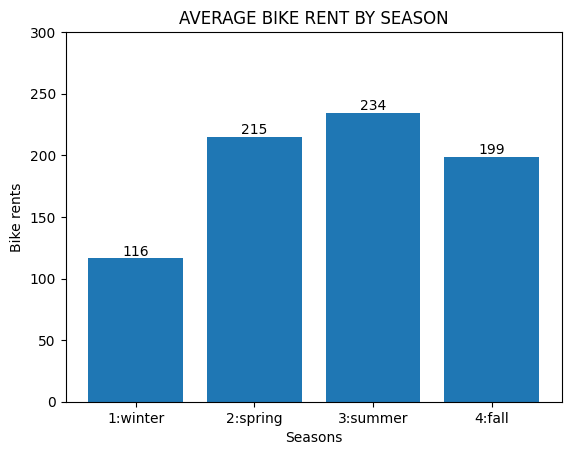

In [ ]:
# Obtenemos una gráfica de la media de las bicicletas rentadas por estacionalidad
fig, ax = plt.subplots()
bar_container = ax.bar(["1:winter", "2:spring", "3:summer", "4:fall"], mean_season)
ax.set(ylabel='Bike rents', xlabel='Seasons',title='AVERAGE BIKE RENT BY SEASON', ylim=(0, 300))
ax.bar_label(bar_container, fmt='{:,.0f}')
plt.show()

In [ ]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


**Análisis de los datos**

Se observa que con un promedio de 234 bicicletas, la temporada donde se arriendan la mayor cantidad de bicicletas es en verano. Esto debido a que el clima se acentúa más durante esta epoca del año y hace posible realizar esta actividad. Inclusive se puede observar que la mayor cantidad de arriendos, que equivalen a 977 bicicletas, ocurrió durante el verano. Por otro lado, la temporada con menor arriendo de bicicletas es invierno con un promedio de 116 bicicletas y un máximo de 801 bicicletas arrendadas. Para esta epoca del año es muy dificil debido al clima utilizar este medio de transporte por lo cual los programas de arrendamiento de bicicletas deben buscar nuevas estrategias para ejecutar durante esta epoca del año.
1:winter, 2:spring, 3:summer, 4:fall

In [ ]:
# Celda 1.2
mean_hour = bikes.groupby('hour').total.mean()

In [ ]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


**Análisis de los datos**

Realizando un análisis de datos, se puede observar que los picos máximos de arriendo de biciletas se dan a las 8 de la mañana y a las 5 y 6 de la tarde, esto se puede relacionar a que las personas arriendan su medio de transporte para dirigirse al trabajo, escuela, universidad, etc. que generalmente los horarios son de 8am-5pm  o de 8am-6pm. El máximo ocurre a las 6:00p.m. con un total de 977 bicicletas arrendadas.Por otro lado en promedio 362 bicicletas son arrendadas a las 8am, mientras que a las 5 y 6 de la tarde en promedio se arriendan 468 y 430 bicicletas respectivamente.

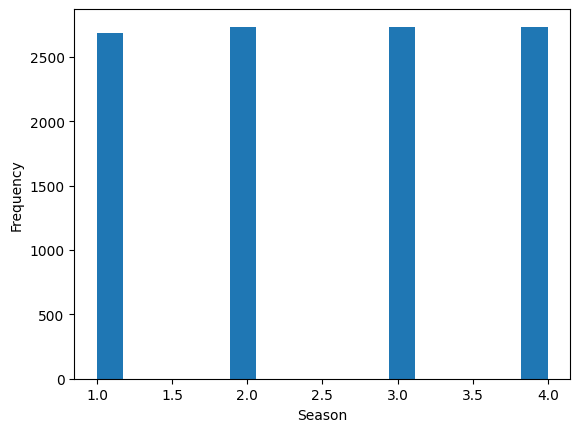

In [ ]:
# Realizamos un histograma para cada una de las variables, tanto "season" como "hour"
plt.hist(bikes["season"], bins='auto')
plt.xlabel("Season")
plt.ylabel("Frequency")
plt.show()

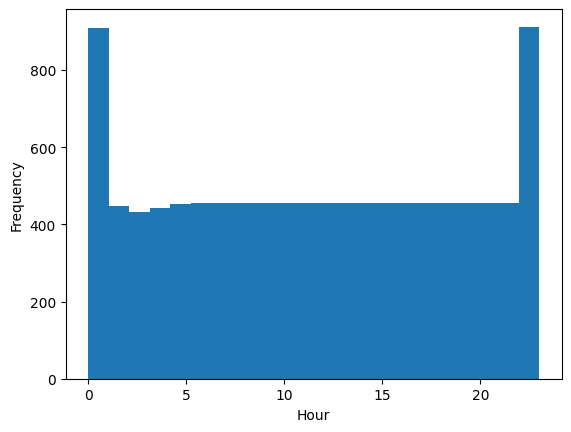

In [ ]:
# histograma de la variable "hour"
plt.hist(bikes["hour"], bins='auto')
plt.xlabel("Hour")
plt.ylabel("Frequency")
plt.show()

Con el histograma podemos confirmar que el comportamiento de arriendo de bicicletas en las 4 estaciones es muy similar, por otro lado, se tiene un registro de las 24 horas del día para la variable hora y se ve una disminución en las horas 3 y 4 a.m.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

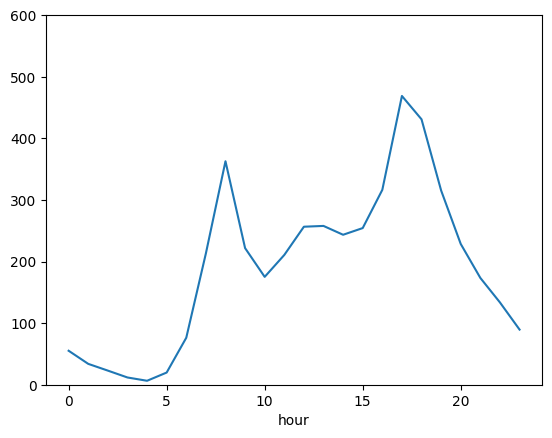

In [ ]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot(ylim=(0, 600))

<Axes: xlabel='hour'>

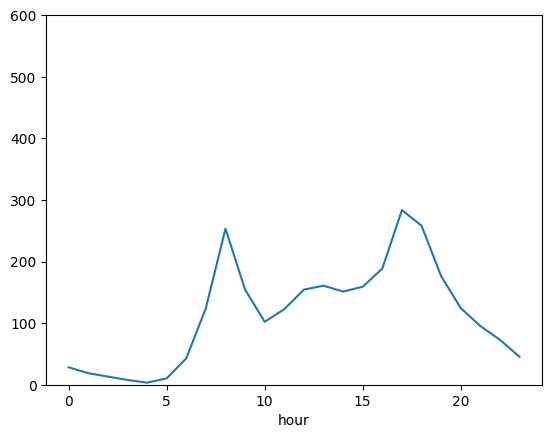

In [ ]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes[bikes.season==1].groupby('hour').total.mean().plot(ylim=(0, 600))


<Axes: xlabel='hour'>

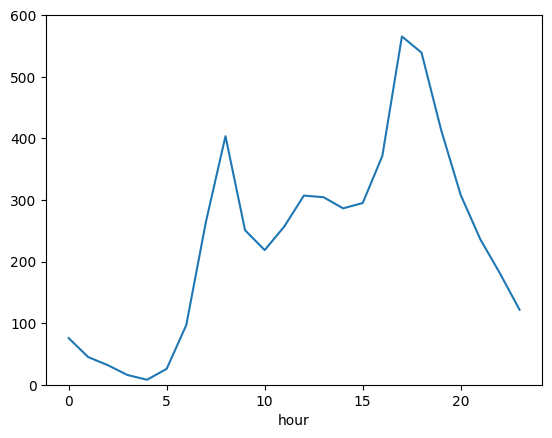

In [ ]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes[bikes.season==3].groupby('hour').total.mean().plot(ylim=(0, 600))

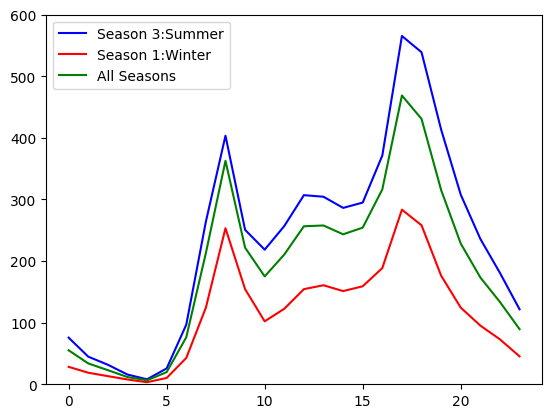

In [ ]:
# Gráfica 1: season=3
plt.plot(bikes[bikes.season==3].groupby('hour').total.mean(), color='blue', label='Season 3:Summer')

# Gráfica 2: season=1
plt.plot(bikes[bikes.season==1].groupby('hour').total.mean(), color='red', label='Season 1:Winter')

# Gráfica 3: Todas las estaciones
plt.plot(bikes.groupby('hour').total.mean(), color='green', label='All Seasons')

# Configuración de la leyenda y el eje y
plt.legend()
plt.ylim(0, 600)

# Mostrar la gráfica resultante
plt.show()

**Análisis de datos**

Se puede observar en la gráfica del promedio de número de bicicletas rentadas para cada hora en cada estacionalidad, un comportamiento similar, con los mismos picos de horas de arrendamiento tanto en verano, en invierno y en el promedio de todas las estaciones, lo unico que varia es la cantidad de bicicletas arrendadas. En verano se tiene la mayor cantidad de bicicletas en arriendo, mientras que en invierno se encuentra el promedio por debajo del promedio total de todas las estacionalidades. El promedio de bicicletas que son arrendadas a las 4 am para todas las estacionalidades es muy bajo. Por esta razón, se reafirma la hipotesis de que los picos ocurren a las 8 am y 5-6 pm debido a que es el momento en donde las personas salen de sus casas y vuelven de sus trabajos, escuelas, universidades, etc.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [ ]:
#Celda 3

from sklearn import linear_model
# Definimos las variables predictoras y la variable respuesta
X = bikes[['season','hour']]
y = bikes.total

# Usamos onehotEncoder para transformar la variable season
onehot_encoder = OneHotEncoder(sparse=False)
season_encoded = onehot_encoder.fit_transform(X['season'].values.reshape(-1, 1))

X[["winter","spring","summer","fall"]] = season_encoded
X = X[["hour","winter","spring","summer","fall"]]

# Creamos el modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Ajustamos el modelo a los datos
modelo.fit(X, y)

# Obtenemos el valor de los coeficientes, el intercepto y la raiz del error cuadratico medio
print('Coeficientes: ', modelo.coef_)
print('Intercepto: ', modelo.intercept_)
print("La raiz del error cuadradico medio es: %.2f" % np.sqrt(np.mean((modelo.predict(X) - y) ** 2)))

Coeficientes:  [ 10.54520609 -75.96697493  24.35025698  43.50057501   8.11614294]
Intercepto:  69.53671247143535
La raiz del error cuadradico medio es: 159.63


**Análisis de datos**


En este caso, las limitaciones de la regresión lineal para este caso es que asume que la relación entre las variables predictoras y la variable de respuesta es lineal. Sin embargo, esta suposición para el caso de la variable categórica "season", la relación con la variable de respuesta se puede ver en la gráfica que no es lineal. Sin embargo, podemos sacar algunas observaciones de los resultados:

El modelo quedo de la siguiente forma:

*-75.9 (winter) + 24.3 (spring)  + 43.5 (summer) +  8.11 (fall) + 10.5 (hour) +  69.5 = Total*


Teniendo en cuenta los análisis que se realizaron anteriormente, la variable Winter y Total eran inversamente proporcional tal como se percibe en el modelo en donde desmuestra que el arriendo de bicicletas disminuye en invierno. Por otro lado, para la variable Summer son directamente proporcional y tiene el coeficiente que mayor impacta el total por lo cual en Verano mayor arriendos de bicicletas se tendrán. 

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [ ]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = None
num_pct=10
max_features = None
min_gain=0.001

# Impresión variable a usar (Total)
j = 1
print(X.columns[j])
X = bikes[['season','hour']]
# División de la variable Total en num_ctp puntos (parámetro definido anteriormente) para obtener posibles puntos de corte
splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / num_pct).tolist())
splits = np.unique(splits)
splits

# División de las observaciones usando el punto de corte en la posición 6 de la lista de splits
k=6
filter_l = X.iloc[:, j] < splits[k]

# División de la variable de respuesta de acuerdo a si la observación cumple o no con la regla binaria
# y_l: la observación tiene un valor menor al punto de corte seleccionado
# y_r: la observación tiene un valor mayor o igual al punto de corte seleccionado
y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)
    
# Gini index de las observaciones que tienen un valor menor al punto de corte seleccionado
gini_l = gini(y_l)
gini_l

# Gini index de las observaciones que tienen un valor mayor o igual al punto de corte seleccionado
gini_r = gini(y_r)
gini_r

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

# Ganancia de la variable 'Total' en el punto de corte selecionado
gini_impurity(X.iloc[:, j], y, splits[k])

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

# Obtención de la variable 'j', su punto de corte 'split' y su ganancia 'gain'
j, split, gain = best_split(X, y, 5)
j, split, gain

# División de las observaciones usando la mejor variable 'j' y su punto de corte 'split'
filter_l = X.iloc[:, j] < split

y_l = y.loc[filter_l]
y_r = y.loc[~filter_l]

y.shape[0], y_l.shape[0], y_r.shape[0]

y.mean(), y_l.mean(), y_r.mean()

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5) 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree

# Aplicación de la función tree_grow
tree_grow(X, y, level=0, min_gain=0.001, max_depth=1, num_pct=10)

tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=6, num_pct=10)
tree

# Definición de la función tree_predict para hacer predicciones según las variables 'X' y el árbol 'tree'

def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

# Ejecución de función tree_predict
tree_predict(X, tree)

winter


array([1., 1., 1., ..., 1., 1., 1.])

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [ ]:
# Celda 5

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 6)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())

In [ ]:
# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.025261134067952253, 4)

In [ ]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=1)
clf = clf.fit(X_train, y_train)

In [ ]:
# Uso de la función .feature_importances_ para obtener la importancia de cada variable
pd.DataFrame({'feature':('season', 'hour'), 'importance':clf.feature_importances_}).sort_values('importance')

,feature,importance
0,season,0.241868
1,hour,0.758132


**Análisis de datos**

Teniendo en cuenta  los resultados, podemos determina cuál es la importancia de las variables. Para este caso la que más se utiliza para partir el arbol son las horas en las que se arriendan la bicicleta.

In [ ]:
# Impresión de resultados de desempeño del árbol de decisión
pd.Series(cross_val_score(clf, X, y, cv=10)).describe()

count    10.000000
mean      0.025261
std       0.006956
min       0.015611
25%       0.020436
50%       0.026183
75%       0.029865
max       0.034894
dtype: float64

Finalmente, entendemos cuál es el performance del árbol utilizando validación cruzada. Este nos está diciendo que, en promedio, el árbol está teniendo un "accuracy" del 2% muy bajo.

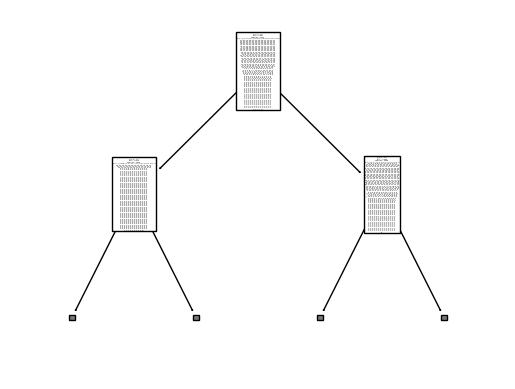

In [ ]:
plot_tree(clf,max_depth=1)
plt.show()

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [ ]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [ ]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [ ]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [ ]:
# Celda 6
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(X_train, y_train)

In [ ]:
# Evaluar desempeño del modelo de árbol de decisión
y_pred_tree = clf.predict(X_test)
acc_tree = accuracy_score(y_test, y_pred_tree.round())
f1_tree = f1_score(y_test, y_pred_tree.round(), average='weighted')
print("Accuracy del modelo de árbol de decisión:", acc_tree)
print("F1-score del modelo de árbol de decisión:", f1_tree)

Accuracy del modelo de árbol de decisión: 0.5686666666666667
F1-score del modelo de árbol de decisión: 0.5683511422885793


In [ ]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58       744
           1       0.58      0.54      0.56       756

    accuracy                           0.57      1500
   macro avg       0.57      0.57      0.57      1500
weighted avg       0.57      0.57      0.57      1500



In [ ]:
from sklearn.linear_model import LogisticRegression
# Ajustar modelo de regresión logística
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Evaluar desempeño del modelo de regresión logística
y_pred_logistic = logistic_model.predict(X_test)
acc_logistic = accuracy_score(y_test, y_pred_logistic.round())
f1_logistic = f1_score(y_test, y_pred_logistic.round(), average='weighted')
print("Accuracy del modelo de regresión logística:", acc_logistic)
print("F1-score del modelo de regresión logística:", f1_logistic)

Accuracy del modelo de regresión logística: 0.6133333333333333
F1-score del modelo de regresión logística: 0.613283836832224


In [ ]:
print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62       744
           1       0.62      0.60      0.61       756

    accuracy                           0.61      1500
   macro avg       0.61      0.61      0.61      1500
weighted avg       0.61      0.61      0.61      1500



**Análisis de Datos**

Se puede observar que el modelo de regresión logística obtiene mejores resultados para  accuracy, precision, recall y f1-score que fueron las métricas evaluadas.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [ ]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=300, n_jobs=-1, oob_score=True) 

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

(0.6518032786885246, 0.646)

In [ ]:
#Iniciamos creando los 3 escenarios planteados en el enunciado
escenario1 = DecisionTreeClassifier(max_depth=2)
escenario2 = DecisionTreeClassifier(min_samples_leaf=2)
escenario3 = LogisticRegression()

#Realizamos el bagging para cada uno de los escenarios
escenario1_bagging = BaggingClassifier(escenario1, n_estimators=100)
escenario2_bagging = BaggingClassifier(escenario2, n_estimators=100)
escenario3_bagging = BaggingClassifier(escenario3, n_estimators=100)

# Predicción y desempeño al hacer votación mayoritaria
#Ajustamos los modelos
escenario1_bagging.fit(X_train, y_train)
escenario2_bagging.fit(X_train, y_train)
escenario3_bagging.fit(X_train, y_train)
#Realizamos el ensamblaje de los 3 modelos
ensamblaje = VotingClassifier(estimators=[('escenario1_bagging', escenario1_bagging), ('escenario2_bagging', escenario2_bagging), ('escenario3_bagging', escenario3_bagging)], voting='hard')
ensamblaje.fit(X_train, y_train)
# Realizamos la evaluación de modelos
escenario1_bagging_pred = escenario1_bagging.predict(X_test)
escenario2_bagging_pred = escenario2_bagging.predict(X_test)
escenario3_bagging_pred = escenario3_bagging.predict(X_test)

#Obtenemos los resultados
print("Accuracy y F1-score para los modelos base:")
print("Arboles de decisión donde max_depth=2: ")
print("Accuracy:", accuracy_score(y_test, escenario1_bagging_pred))
print("F1-score:", f1_score(y_test, escenario1_bagging_pred))
print("árboles de decisión donde min_samples_leaf=2: ")
print("Accuracy:", accuracy_score(y_test, escenario2_bagging_pred))
print("F1-score:", f1_score(y_test, escenario2_bagging_pred))
print("Regresión logística: ")
print("Accuracy:", accuracy_score(y_test, escenario3_bagging_pred))
print("F1-score:", f1_score(y_test, escenario3_bagging_pred))

# Evaluación del ensamble de modelos
ensamblaje_pred = ensamblaje.predict(X_test)
print("\nAccuracy y F1-score para el ensamble de modelos:")
print("Accuracy:", accuracy_score(y_test, ensamblaje_pred))
print("F1-score:", f1_score(y_test, ensamblaje_pred))



Accuracy y F1-score para los modelos base:
Arboles de decisión donde max_depth=2: 
Accuracy: 0.6453333333333333
F1-score: 0.6443850267379679
árboles de decisión donde min_samples_leaf=2: 
Accuracy: 0.6486666666666666
F1-score: 0.6479625918503674
Regresión logística: 
Accuracy: 0.622
F1-score: 0.6171505739365294

Accuracy y F1-score para el ensamble de modelos:
Accuracy: 0.6486666666666666
F1-score: 0.6489007328447701


**Análisis de datos**

Comparando los resultados de los modelos, la regresión logística es la que tiene un menor rendimiento. En cuanto al accuracy, se tiene el mejor rendimiento en el árbol de decisión del escenario 2 con min_samples_leaf = 2 y en el ensamble de todos los modelos. El mejor F1-Score también lo obtiene el ensamble de modelos. Se puede concluir que el ensamble de modelos tiene un mejor rendimiento que el escenario 1 y 2

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [ ]:
# Definición del modelo BaggingClassifier de la libreria sklearn
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)

# Predicción y desempeño al hacer votación mayoritaria
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
metrics.f1_score(y_pred, y_test), metrics.accuracy_score(y_pred, y_test)

mod_names = ["rf1: ","rf2: ","lr: "]
j=0
modelos = [escenario1_bagging,escenario2_bagging,escenario3_bagging]
for m in modelos:
    errors = np.zeros(clf.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))

    for i in range(clf.n_estimators):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
        
    alpha = (1 - errors) / (1 - errors).sum()
    y_pred1 = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(np.int)
    print(mod_names[j]+str(round(f1_score(y_pred1, y_test),2)), round(accuracy_score(y_pred1, y_test),2))
    j=j+1

eclf = VotingClassifier(estimators=[('lr', modelos[0]), ('rf1', modelos[1]), ('rf2', modelos[2])], voting='soft')
print("Method: ", eclf)
eclf_model = eclf.fit(X_train,y_train)
ytest_pred = eclf_model.predict(X_test)
print("voting esemble: "+str(round(f1_score(y_test,ytest_pred),2)),round(accuracy_score(y_test,ytest_pred),2))


rf1: 0.65 0.65
rf2: 0.65 0.65
lr: 0.65 0.65
Method:  VotingClassifier(estimators=[('lr',
                              BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                                                n_estimators=100)),
                             ('rf1',
                              BaggingClassifier(estimator=DecisionTreeClassifier(min_samples_leaf=2),
                                                n_estimators=100)),
                             ('rf2',
                              BaggingClassifier(estimator=LogisticRegression(),
                                                n_estimators=100))],
                 voting='soft')
voting esemble: 0.66 0.66


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

**Celda 9**

En conclusión, luego de realizar diferentes metodologías, se puede observar que un ensamble con la metodología de Votación ponderada usando método "soft" tiene un mejor desempeño debido a que se obtiene un mayor F1 score. Esto indica la capacidad del modelo para separar una clase de otra clase, por lo tanto es muy importante a la hora de escoger un mejor modelo. Además en ambos puntos se puede observar que el ensamble de modelos tiene un mayor rendimiento.